In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import itertools

In [2]:
#Reading the csv
flight_data = pd.read_csv('/Users/aayushgambhir/Desktop/George Brown Course/Applied Mathematics Lab/Term project/lastest_flight_data_full_afterdatacleanv5.csv')

In [3]:
#Dropping columns with missing values
flight_data.dropna(subset=['AIR_TIME'], inplace=True)

In [4]:
# Change text column to floating column
label_encoder_airline = LabelEncoder()
label_encoder_origin = LabelEncoder()
label_encoder_dest = LabelEncoder()

flight_data['AIRLINE_ENC'] = label_encoder_airline.fit_transform(flight_data['AIRLINE'])
flight_data['ORIGIN_CITY_ENC'] = label_encoder_origin.fit_transform(flight_data['ORIGIN_CITY'])
flight_data['DEST_CITY_ENC'] = label_encoder_dest.fit_transform(flight_data['DEST_CITY'])

flight_data

,FL_DATE,AIRLINE,AIRLINE_CODE,ORIGIN_CITY,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,...,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,Delay_actual,AIRLINE_ENC,ORIGIN_CITY_ENC,DEST_CITY_ENC
0,20/8/2023,Spirit Air Lines,NK,"Boston, MA","Miami, FL",1620,1626.0,6.0,15.0,1641.0,...,1258,0.0,0.0,0.0,0.0,0.0,0,16,31,153
1,22/9/2021,United Air Lines Inc.,UA,"Chicago, IL","Madison, WI",1755,1750.0,-5.0,18.0,1808.0,...,109,0.0,0.0,0.0,0.0,0.0,0,17,49,147
2,24/7/2019,Alaska Airlines Inc.,AS,"Ketchikan, AK","Seattle, WA",1725,1714.0,-11.0,8.0,1722.0,...,680,0.0,0.0,0.0,0.0,0.0,0,0,128,230
3,21/5/2021,Spirit Air Lines,NK,"Los Angeles, CA","Chicago, IL",40,33.0,-7.0,17.0,50.0,...,1744,0.0,0.0,0.0,0.0,0.0,0,16,147,48
4,11/1/2023,Allegiant Air,G4,"Sarasota/Bradenton, FL","Nashville, TN",1514,1454.0,-20.0,16.0,1510.0,...,648,0.0,0.0,0.0,0.0,0.0,0,1,230,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,13/5/2022,PSA Airlines Inc.,OH,"Washington, DC","Manchester, NH",1020,1106.0,46.0,62.0,1208.0,...,406,46.0,0.0,31.0,0.0,0.0,2,12,262,148
5996,22/3/2022,Southwest Airlines Co.,WN,"Austin, TX","Burbank, CA",1805,2057.0,172.0,15.0,2112.0,...,1241,18.0,0.0,0.0,0.0,143.0,2,15,17,36
5997,20/9/2019,Alaska Airlines Inc.,AS,"San Jose, CA","Lihue, HI",910,1048.0,98.0,18.0,1106.0,...,2466,77.0,0.0,0.0,0.0,0.0,2,0,222,140
5998,19/9/2021,Delta Air Lines Inc.,DL,"Salt Lake City, UT","Santa Ana, CA",1145,1457.0,192.0,12.0,1509.0,...,588,191.0,0.0,0.0,0.0,0.0,2,3,218,222


In [5]:
# Dropping irrelevant columns 
drop_feature=['AIRLINE_CODE','DEP_DELAY','ARR_DELAY','AIRLINE', 'ORIGIN_CITY', 'DEST_CITY', 'FL_DATE', 'Delay_actual', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT']
flight_data_without_label = flight_data.drop(drop_feature,axis=1)
X = flight_data_without_label
y = flight_data['Delay_actual']
X

,CRS_DEP_TIME,DEP_TIME,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,AIRLINE_ENC,ORIGIN_CITY_ENC,DEST_CITY_ENC
0,1620,1626.0,15.0,1641.0,1922.0,8.0,1957,1930.0,217.0,184.0,161.0,1258,16,31,153
1,1755,1750.0,18.0,1808.0,1835.0,2.0,1851,1837.0,56.0,47.0,27.0,109,17,49,147
2,1725,1714.0,8.0,1722.0,2002.0,13.0,2020,2015.0,115.0,121.0,100.0,680,0,128,230
3,40,33.0,17.0,50.0,611.0,10.0,633,621.0,233.0,228.0,201.0,1744,16,147,48
4,1514,1454.0,16.0,1510.0,1551.0,6.0,1614,1557.0,120.0,123.0,101.0,648,1,230,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,1020,1106.0,62.0,1208.0,1319.0,5.0,1207,1324.0,107.0,138.0,71.0,406,12,262,148
5996,1805,2057.0,15.0,2112.0,2205.0,1.0,1925,2206.0,200.0,189.0,173.0,1241,15,17,36
5997,910,1048.0,18.0,1106.0,1258.0,14.0,1155,1312.0,345.0,324.0,292.0,2466,0,222,140
5998,1145,1457.0,12.0,1509.0,1537.0,9.0,1235,1546.0,110.0,109.0,88.0,588,3,218,222


In [6]:
#  Helper function to plot Confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Oranges):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

## Applying the model

In [8]:
# Split the dataset into training and testing sets
# "X": features used for training and testing
# "y": target labels corresponding to the features
# "test_size": specifies that 20% of the data will be reserved for testing
# "random_state": ensures the split is reproducible by setting a seed (42 is commonly used)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
RF_clf = RandomForestClassifier(n_estimators=50)  # "n_estimators": number of trees in the forest, default=100
                                                  # "max_depth": max depth of the trees
                                                  # "max_features": number of features to consider when looking for the best split
                                                  # "bootstrap": default=True
                                                  # "max_samples": default=None
                                                  #  If bootstrap is True, the number of samples to draw from X to train each base estimator
RF_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [11]:
# Make predictions on the test dataset (X_test) using the trained Random Forest model (RF_clf)
# The predicted labels are stored in RFC_pred
RFC_pred = RF_clf.predict(X_test)

In [12]:
# Calculate the confusion matrix before any modifications to the model predictions
# This matrix compares the true labels (y_test) to the predicted labels (RFC_pred) from the Random Forest model
confusion_matrix_b4 = confusion_matrix(y_test,RFC_pred)

Confusion matrix, without normalization
[[351  84   2]
 [ 93 264  23]
 [  4  56 323]]


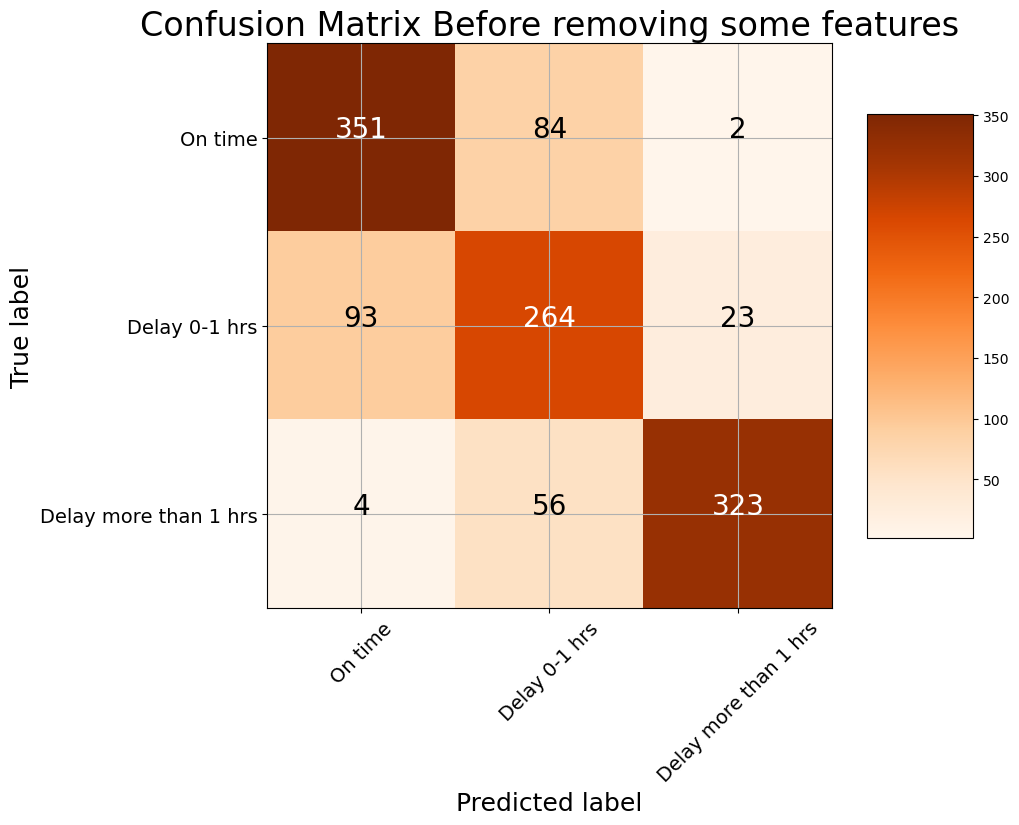

In [13]:
#Plotting confusion matrix
plot_confusion_matrix(confusion_matrix_b4, classes = ['On time', 'Delay 0-1 hrs', 'Delay more than 1 hrs'],
                      title = 'Confusion Matrix Before removing some features')

In [15]:
# Assuming y_test contains the true labels for the test set and RFC_pred contains the predicted labels from the Random Forest model

# Calculate the accuracy of the model by comparing the true labels to the predicted labels
accuracy = accuracy_score(y_test, RFC_pred)

# Generate the confusion matrix to evaluate the model's performance (true vs predicted labels)
conf_matrix = confusion_matrix(y_test, RFC_pred)

# Generate a classification report that includes precision, recall, F1 score, and support for each class
class_report = classification_report(y_test, RFC_pred)

# Print the accuracy of the model
print(f"Accuracy of the model is: {accuracy}")

# Print the confusion matrix to assess the number of true positives, true negatives, false positives, and false negatives
print(f"Confusion Matrix of the model is: \n{conf_matrix}")

# Print the classification report for detailed metrics on model performance across different classes
print(f"Classification Report of the model is: \n{class_report}")

Accuracy of the model is: 0.7816666666666666
Confusion Matrix of the model is: 
[[351  84   2]
 [ 93 264  23]
 [  4  56 323]]
Classification Report of the model is: 
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       437
           1       0.65      0.69      0.67       380
           2       0.93      0.84      0.88       383

    accuracy                           0.78      1200
   macro avg       0.79      0.78      0.78      1200
weighted avg       0.79      0.78      0.78      1200



## Dropping some featurs and improving the model

In [18]:
#Keeping the four most correlated features
drop_feature_after_improve=['DEP_DELAY','ARR_DELAY','AIRLINE', 'ORIGIN_CITY', 'DEST_CITY', 'FL_DATE', 'Delay_actual', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT','TAXI_OUT','WHEELS_OFF','WHEELS_ON','TAXI_IN','CRS_DEP_TIME','DEP_TIME','CRS_ELAPSED_TIME','AIRLINE_ENC','DEST_CITY_ENC','ORIGIN_CITY_ENC','DISTANCE']

X_improve = flight_data[['DEP_TIME','TAXI_OUT','CRS_DEP_TIME','WHEELS_OFF']]
y_improve = flight_data['Delay_actual']
X_improve

,DEP_TIME,TAXI_OUT,CRS_DEP_TIME,WHEELS_OFF
0,1626.0,15.0,1620,1641.0
1,1750.0,18.0,1755,1808.0
2,1714.0,8.0,1725,1722.0
3,33.0,17.0,40,50.0
4,1454.0,16.0,1514,1510.0
...,...,...,...,...
5995,1106.0,62.0,1020,1208.0
5996,2057.0,15.0,1805,2112.0
5997,1048.0,18.0,910,1106.0
5998,1457.0,12.0,1145,1509.0


In [19]:
# Split the dataset into training and testing sets
# "X_improve": features used for training and testing
# "y_improve": target labels corresponding to the features
# "test_size": proportion of the dataset to include in the test split (20% of the data will be used for testing)
# "random_state": seed used by the random number generator for reproducibility (42 ensures the split is consistent across runs)
X_train_improve, X_test_improve, y_train_improve, y_test_improve = train_test_split(X_improve, y_improve, test_size=0.2, random_state=42)

In [20]:
# Initialize the RandomForestClassifier with 50 decision trees ("n_estimators": number of trees in the forest, default is 100)
RF_clf = RandomForestClassifier(n_estimators=50)

# "max_depth": maximum depth of each tree, controls how deep the tree can grow (default is None, which means trees grow until all leaves are pure)
# "max_features": number of features to consider when looking for the best split (controls how many input features are used at each split)
# "bootstrap": default is True, indicating that bootstrap samples (sampling with replacement) will be used to train each tree
# "max_samples": default is None, meaning all samples are used if bootstrap is True.
# If bootstrap is True, "max_samples" controls the number of samples to draw from X to train each tree (default is all samples).

# Fit the RandomForestClassifier model to the improved training data
RF_clf.fit(X_train_improve, y_train_improve)

# Make predictions on the improved test data using the trained RandomForest model
RFC_pred_improve = RF_clf.predict(X_test_improve)

Confusion matrix, without normalization
[[363  74   0]
 [ 62 292  26]
 [  3  41 339]]


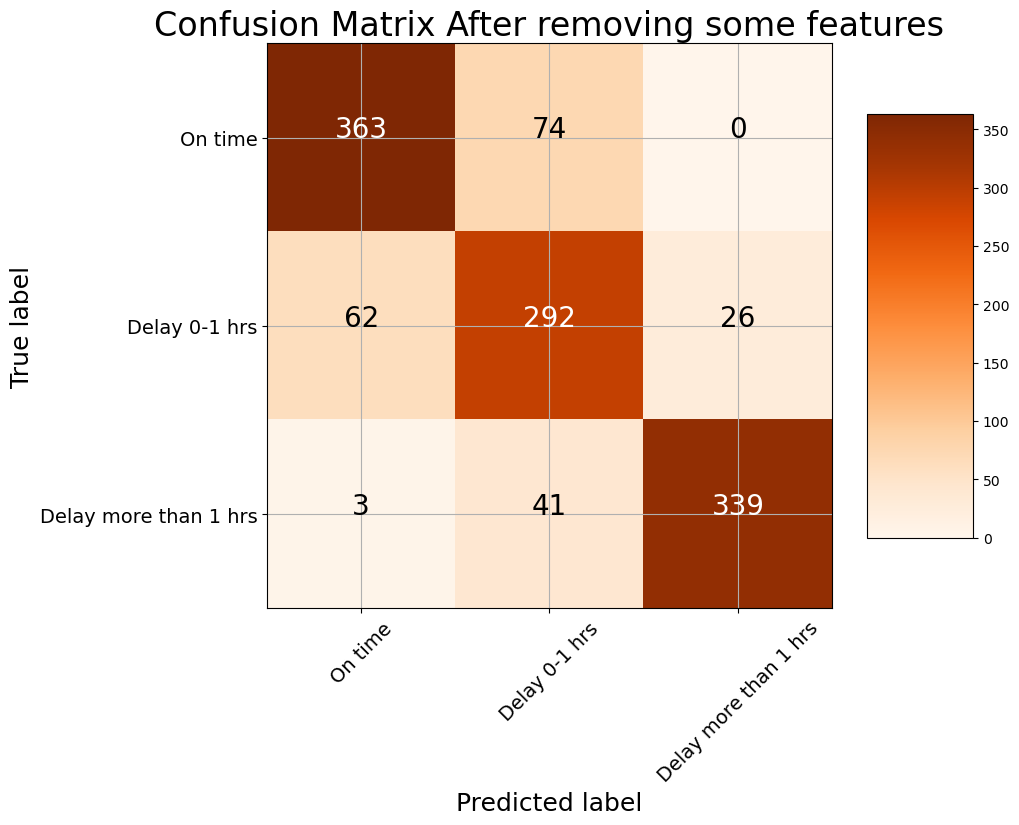

In [21]:
#Plotting the confusion matrix
plot_confusion_matrix(confusion_matrix(y_test_improve,RFC_pred_improve), classes = ['On time', 'Delay 0-1 hrs', 'Delay more than 1 hrs'],
                      title = 'Confusion Matrix After removing some features')

In [27]:
# Calculate the accuracy of the model on the improved test data
accuracy_improved = accuracy_score(y_test_improve, RFC_pred_improve)

# Generate the confusion matrix to evaluate model performance on the improved test data
conf_matrix_improved = confusion_matrix(y_test_improve, RFC_pred_improve)

# Generate the classification report, including precision, recall, and F1 score for each class
class_report_improved = classification_report(y_test_improve, RFC_pred_improve)

# Print the accuracy of the model on the improved test data
print(f"Accuracy of the model is: {accuracy_improved}")

# Print the confusion matrix of the model's predictions on the improved test data
print(f"Confusion Matrix of the model is: \n{conf_matrix_improved}")

# Print the classification report, showing precision, recall, and F1 scores for each class
print(f"Classification Report of the model is: \n{class_report_improved}")

Accuracy of the model is: 0.8283333333333334
Confusion Matrix of the model is: 
[[363  74   0]
 [ 62 292  26]
 [  3  41 339]]
Classification Report of the model is: 
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       437
           1       0.72      0.77      0.74       380
           2       0.93      0.89      0.91       383

    accuracy                           0.83      1200
   macro avg       0.83      0.83      0.83      1200
weighted avg       0.83      0.83      0.83      1200



## Fine tuning the model using GridSearchCV

In [26]:
# Define the hyperparameter grid for RandomForest
param_grid_random = {
    'n_estimators': [50, 100, 200],            # Number of trees in the forest (controls the number of decision trees)
    'max_depth': [10, 20, 30, None],           # Maximum depth of the tree (limits how deep the tree can go to avoid overfitting)
    'min_samples_split': [2, 5, 10],           # Minimum number of samples required to split a node (controls the complexity of the tree)
    'min_samples_leaf': [1, 2, 4],             # Minimum number of samples required to be at a leaf node (prevents small sample splits in leaves)
    'bootstrap': [True, False],                # Whether bootstrap samples are used (True: with replacement, False: without replacement)
    'max_features': ['auto', 'sqrt', 'log2']   # Number of features to consider when finding the best split (controls the feature selection strategy)
}

# Initialize RandomForestClassifier with a fixed random state for reproducibility
random_clf = RandomForestClassifier(random_state=42)

# Use GridSearchCV to find the best combination of hyperparameters with 5-fold cross-validation
# 'n_jobs=-1' allows the use of all available CPU cores to parallelize the search
grid_search_random = GridSearchCV(estimator=random_clf, param_grid=param_grid_random, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the improved training data
grid_search_random.fit(X_train_improve, y_train_improve)

# Extract the best parameters and best score from the grid search
best_params_random = grid_search_random.best_params_
best_score_random = grid_search_random.best_score_

# Use the best estimator from the grid search to predict on the improved test data
y_pred_tuned_random = grid_search_random.best_estimator_.predict(X_test_improve)

# Print the confusion matrix for the test data predictions
print(confusion_matrix(y_test_improve, y_pred_tuned_random))

# Print the best parameters found during the grid search
print(f"Best Parameters: {best_params_random}")

# Print the best accuracy score achieved during the grid search
print(f"Best Score: {best_score_random}")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

[[371  66   0]
 [ 58 300  22]
 [  2  43 338]]
Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8329166666666665


In [35]:
# Calculate accuracy, confusion matrix, and classification report
accuracy_grid = accuracy_score(y_test_improve, y_pred_tuned_random)
conf_matrix_grid = confusion_matrix(y_test_improve, y_pred_tuned_random)
class_report_grid = classification_report(y_test_improve, y_pred_tuned_random)

# Print results
print(f"Best Parameters: {best_params_random}")
print(f"Best Score: {best_score_random}")
print(f"Classification Report of the model is: \n{class_report_grid}")

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best Score: 0.8329166666666665
Classification Report of the model is: 
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       437
           1       0.73      0.79      0.76       380
           2       0.94      0.88      0.91       383

    accuracy                           0.84      1200
   macro avg       0.84      0.84      0.84      1200
weighted avg       0.85      0.84      0.84      1200



Confusion matrix, without normalization
[[371  66   0]
 [ 58 300  22]
 [  2  43 338]]


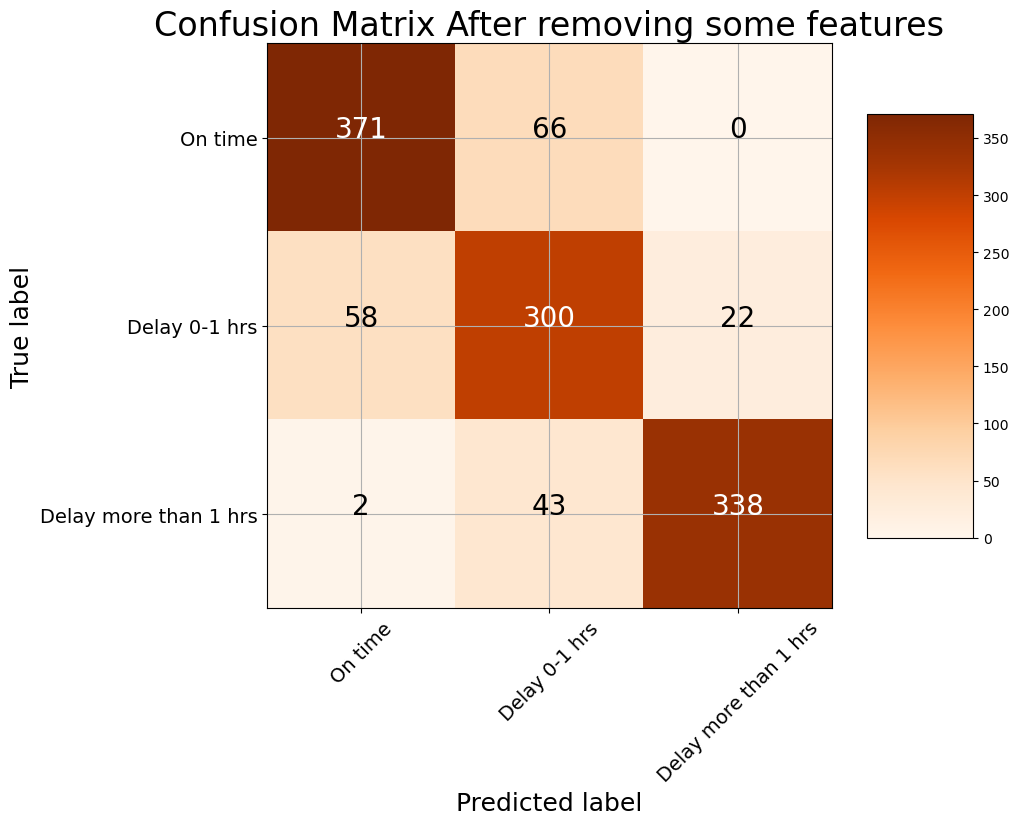

In [34]:
plot_confusion_matrix(confusion_matrix(y_test_improve,y_pred_tuned_random), classes = ['On time', 'Delay 0-1 hrs', 'Delay more than 1 hrs'],
                      title = 'Confusion Matrix After removing some features')